<a href="https://colab.research.google.com/github/alokpatel0172-cyber/alok-patel/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Librarie




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Data Analysis (EDA)

1. Load the dataset and display basic information.

In [ ]:
df = pd.read_csv('/content/CarPrice.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

2. summary statistics.

In [ ]:
df.describe()



,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


3.missing values and outliers.

In [ ]:
df.isnull().sum()
df.isna().sum()




,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


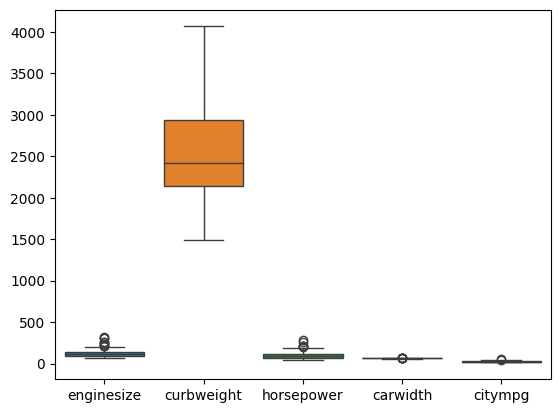

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[['enginesize','curbweight','horsepower','carwidth','citympg']])
plt.show()

4. Plot feature distributions and correlation heatmap.

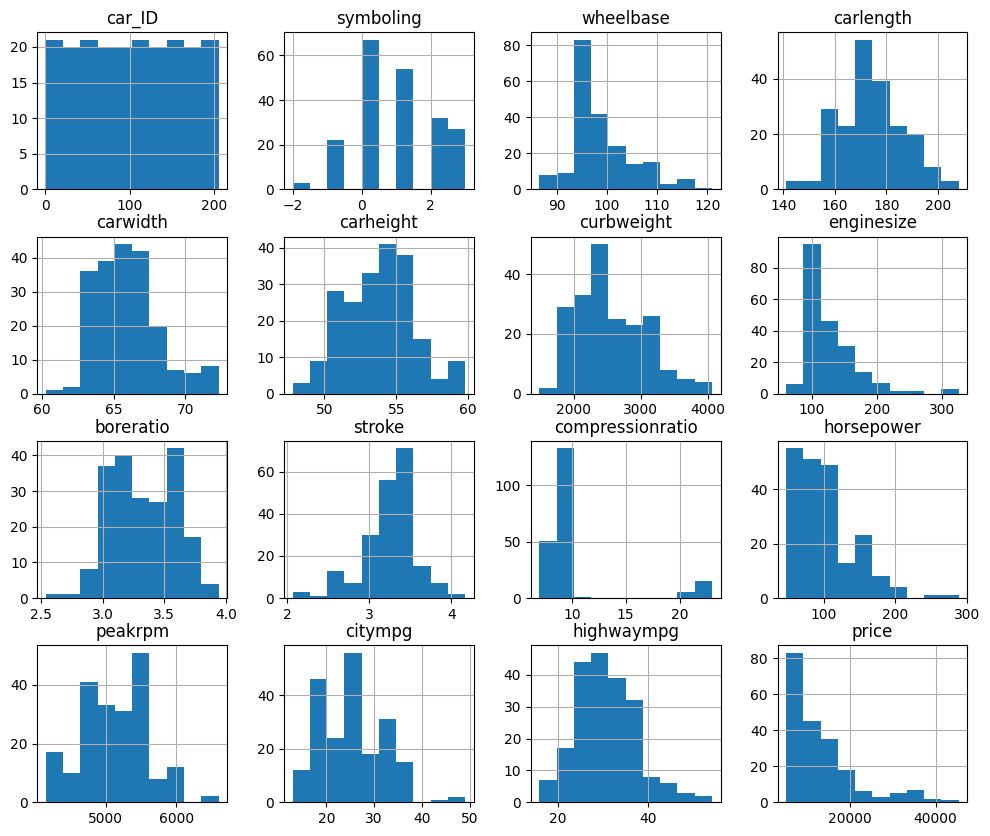

In [ ]:
df.hist(figsize=(12,10))
plt.show()
# distributions graph

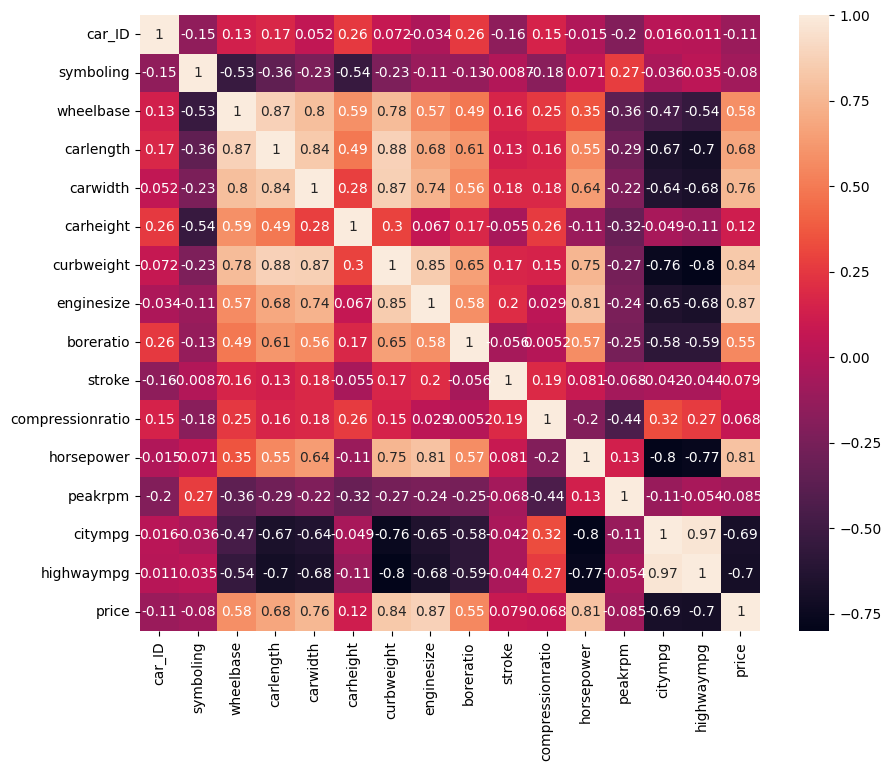

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()
#Correlation Heatmap

# Simple Linear **Regression**

In [2]:
from google.colab import files
uploaded = files.upload()




Saving CarPrice.csv to CarPrice.csv


In [ ]:
import pandas as pd

df = pd.read_csv(list(uploaded.keys())[0])
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


5.feature and build a simple linear regression model.

In [ ]:
X = df[['enginesize']]
y = df['price']
from sklearn.linear_model import LinearRegression

simple_model = LinearRegression()
simple_model.fit(X, y)


LinearRegression()

6. Plot regression line and interpret slope and intercept.

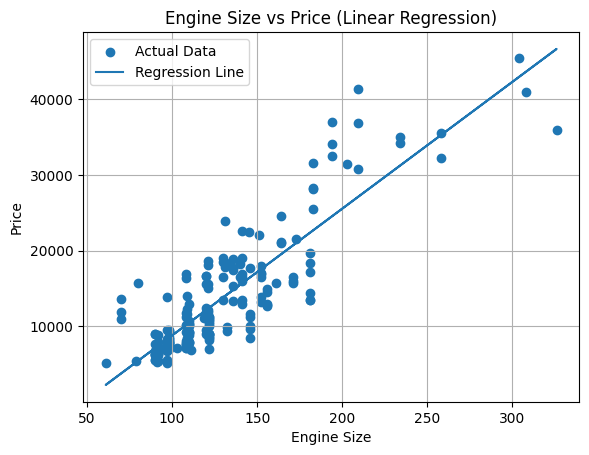

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression


df = pd.read_csv(list(uploaded.keys())[0])

X = df[['enginesize']]
y = df['price']

simple_model = LinearRegression()
simple_model.fit(X, y)

plt.scatter(X, y, marker='o', label="Actual Data")
plt.plot(X, simple_model.predict(X), label="Regression Line")

plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs Price (Linear Regression)")

plt.legend()
plt.grid(True)

plt.show()

# Multiple Linear Regression

7.Multiple Features

In [ ]:
X_multi = df[['enginesize','curbweight','horsepower']]
y_multi = df['price']


In [ ]:
multi_model = LinearRegression()
multi_model.fit(X_multi, y_multi)

pred_multi = multi_model.predict(X_multi)


8. Interpret coefficients and evaluate using MSE, RMSE, and R².

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_multi, pred_multi)
rmse = np.sqrt(mse)
r2 = r2_score(y_multi, pred_multi)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 11824364.398432126
RMSE: 3438.657354031094
R2 Score: 0.8138201347761835


# Polynomial Regression

9 polynomial regression to capture non-linear relationships.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X = X_multi
y = y_multi
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
pred_poly = poly_model.predict(X_poly)
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse_poly = mean_squared_error(y, pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y, pred_poly)

print("Polynomial MSE:", mse_poly)
print("Polynomial RMSE:", rmse_poly)
print("Polynomial R2:", r2_poly)


Polynomial MSE: 10266857.325691378
Polynomial RMSE: 3204.193709139848
Polynomial R2: 0.8383437748736136


10. Compare linear and polynomial regression performance

In [ ]:
print("Linear R2:", r2)
print("Polynomial R2:", r2_poly)


Linear R2: 0.8138201347761835
Polynomial R2: 0.8383437748736136


# Ridge & Lasso Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_multi, y_multi)


Ridge()

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_multi, y_multi)


Lasso(alpha=0.1)

In [ ]:
pred_multi = multi_model.predict(X_multi)


# Model Diagnostics

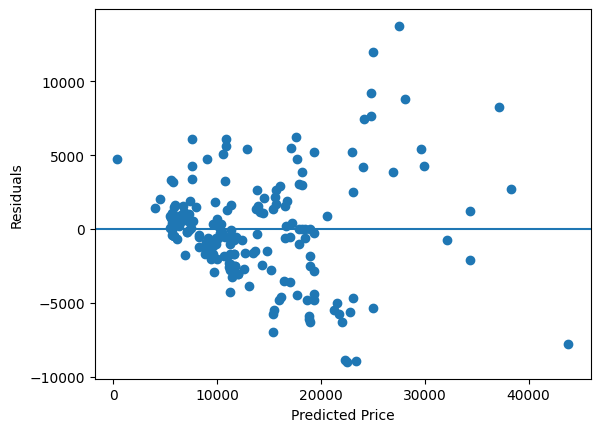

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Create X and Y
X_multi = df[['horsepower','curbweight','enginesize']]
y_multi = df['price']

# Step 2: Train Model
multi_model = LinearRegression()
multi_model.fit(X_multi, y_multi)

# Step 3: Predict
pred_multi = multi_model.predict(X_multi)

# Step 4: Residual Plot
residuals = y_multi - pred_multi

plt.scatter(pred_multi, residuals)
plt.axhline(0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()


In [ ]:
print("Linear R2:", r2)
print("Polynomial R2:", r2_score(y_multi, pred_poly))


Linear R2: 0.8138201347761835
Polynomial R2: 0.8383437748736136
